In [3]:
import matplotlib.pyplot as plt
from pathlib import Path
fig_root = Path("/Users/jliu/workspace/RAG/fig/paper/context")

In [47]:

# Plotting with CI
def plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
              base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci,fig_path):
    
    fig_path.parent.mkdir(parents=True,exist_ok=True)
    
    x = [10**2.5, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**8.5]

    def get_yerr(ci_list, y):
        lower_err = [y[i] - ci[0] for i, ci in enumerate(ci_list)]
        upper_err = [ci[1] - y[i] for i, ci in enumerate(ci_list)]
        return [lower_err, upper_err]

    plt.figure(figsize=(6, 5))

    plt.errorbar(x, base_lm, yerr=get_yerr(base_lm_ci, base_lm),
                 fmt='-o', label='Base LM', color='dodgerblue', linewidth=3.0)

    plt.errorbar(x, knn_1_tau1, yerr=get_yerr(knn_1_tau1_ci, knn_1_tau1),
                 fmt='--s', label='unit_size=1', color='purple', linewidth=2.5)

    plt.errorbar(x, knn_16_tau1, yerr=get_yerr(knn_16_tau1_ci, knn_16_tau1),
                 fmt='--^', label='unit_size=3', color='orange', linewidth=2.5)

    plt.errorbar(x, knn_1024_tau1, yerr=get_yerr(knn_1024_tau1_ci, knn_1024_tau1),
                 fmt=':*', label='unit_size=10', color='green', linewidth=2.5)

    plt.xscale('log')
    plt.xlabel('Pre-training frequency', fontsize=15)
    plt.ylabel('Probability', fontsize=15)
    plt.ylim(0, 1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.savefig(fig_path,format="pdf")
    plt.tight_layout()
    
    #plt.show()

fig_root = Path("/Users/jliu/workspace/RAG/fig/paper/context")
# Data
base_lm = [0.22, 0.30, 0.32, 0.34, 0.37, 0.45, 0.55, 0.72]
base_lm_ci = [
    (0.17, 0.27), (0.26, 0.34), (0.29, 0.35), (0.31, 0.37),
    (0.33, 0.41), (0.42, 0.48), (0.50, 0.60), (0.68, 0.76)
]

# token level

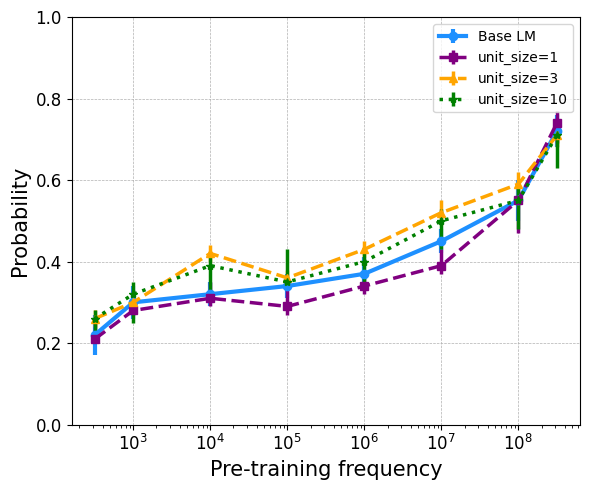

In [48]:
# knn = 16

level = "token"
neighbor = 16

knn_1_tau1     = [0.21, 0.28, 0.31, 0.29, 0.34, 0.39, 0.55, 0.74]
knn_16_tau1    = [0.26, 0.30, 0.42, 0.36, 0.43, 0.52, 0.59, 0.71]
knn_1024_tau1  = [0.26, 0.32, 0.39, 0.35, 0.40, 0.50, 0.55, 0.71]

# Widened confidence intervals for more visible error bars
knn_1_tau1_ci = [
    (0.20, 0.26), (0.27, 0.33), (0.29, 0.35), (0.27, 0.33),
    (0.32, 0.38), (0.37, 0.43), (0.47, 0.55), (0.69, 0.77)
]

knn_16_tau1_ci = [
    (0.24, 0.28), (0.28, 0.32), (0.40, 0.44), (0.34, 0.38),
    (0.41, 0.45), (0.49, 0.55), (0.56, 0.62), (0.68, 0.74)
]

knn_1024_tau1_ci = [
    (0.20, 0.28), (0.25, 0.35), (0.32, 0.42), (0.33, 0.43),
    (0.33, 0.43), (0.43, 0.53), (0.48, 0.58), (0.63, 0.75)
]



fig_path = fig_root / str(neighbor) / f"{level}.pdf"
# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci,fig_path)

plt.savefig(fig_path)

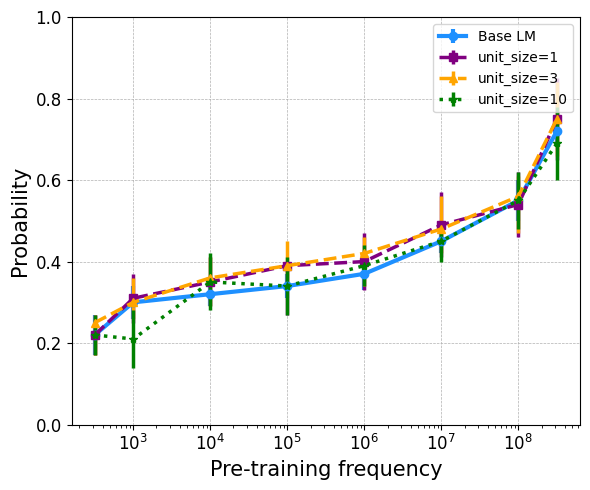

In [49]:
# knn = 16

level = "phrase"
neighbor = 16

knn_1_tau1     = [0.22, 0.31, 0.35, 0.39, 0.40, 0.49, 0.54, 0.75]
knn_16_tau1    = [0.25, 0.30, 0.36, 0.39, 0.42, 0.48, 0.56, 0.75]
knn_1024_tau1  = [0.22, 0.21, 0.35, 0.34, 0.39, 0.45, 0.55, 0.69]

# Widened confidence intervals for more visible error bars
knn_1_tau1_ci = [
    (0.17, 0.27), (0.25, 0.37), (0.29, 0.41), (0.27, 0.39),
    (0.33, 0.47), (0.41, 0.57), (0.46, 0.62), (0.65, 0.85)
]


knn_16_tau1_ci = [
    (0.17, 0.27), (0.26, 0.36), (0.29, 0.41), (0.33, 0.45),
    (0.34, 0.46), (0.42, 0.56), (0.47, 0.61), (0.66, 0.84)
]

knn_1024_tau1_ci = [
    (0.17, 0.27), (0.14, 0.28), (0.28, 0.42), (0.27, 0.41),
    (0.34, 0.44), (0.40, 0.50), (0.48, 0.62), (0.60, 0.78)
]



fig_path = fig_root / str(neighbor) / f"{level}.pdf"
# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci,fig_path)

plt.savefig(fig_path)

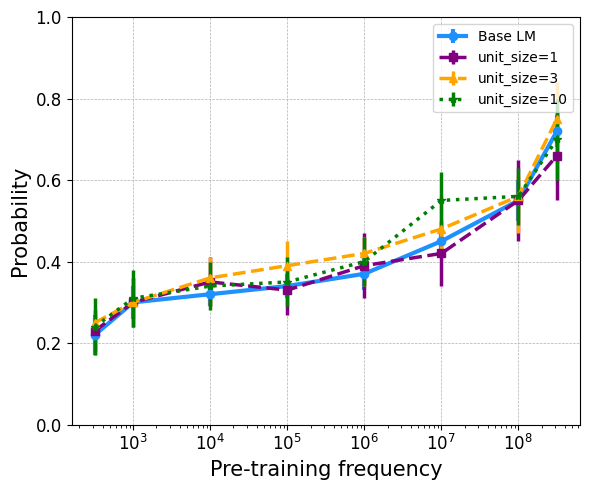

In [50]:
# knn = 16

level = "sentence"
neighbor = 16

knn_1_tau1     = [0.23, 0.30, 0.35, 0.33, 0.39, 0.42, 0.55, 0.66]
knn_16_tau1    = [0.25, 0.30, 0.36, 0.39, 0.42, 0.48, 0.56, 0.75]
knn_1024_tau1  = [0.24, 0.31, 0.34, 0.35, 0.40, 0.55, 0.56, 0.70]

# Widened confidence intervals for more visible error bars
knn_1_tau1_ci = [
    (0.18, 0.28), (0.24, 0.36), (0.29, 0.41), (0.27, 0.39),
    (0.31, 0.47), (0.34, 0.50), (0.45, 0.65), (0.55, 0.77)
]


knn_16_tau1_ci = [
    (0.17, 0.27), (0.26, 0.36), (0.29, 0.41), (0.33, 0.45),
    (0.34, 0.46), (0.42, 0.56), (0.47, 0.61), (0.66, 0.84)
]

knn_1024_tau1_ci =  [
    (0.17, 0.31), (0.24, 0.38), (0.28, 0.40), (0.29, 0.41),
    (0.34, 0.46), (0.48, 0.62), (0.49, 0.63), (0.60, 0.80)
]



fig_path = fig_root / str(neighbor) / f"{level}.pdf"
# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci,fig_path)

plt.savefig(fig_path)

# Effect of neighbor numbers

In [55]:
fig_root = Path("/Users/jliu/workspace/RAG/fig/paper/neighbor")

In [56]:

# Plotting with CI
def plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
              base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci,fig_path):
    x = [10**2.5, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**8.5]

    fig_path.parent.mkdir(parents=True,exist_ok=True)
    print(fig_path)

    def get_yerr(ci_list, y):
        lower_err = [y[i] - ci[0] for i, ci in enumerate(ci_list)]
        upper_err = [ci[1] - y[i] for i, ci in enumerate(ci_list)]
        return [lower_err, upper_err]

    plt.figure(figsize=(6, 5))

    plt.errorbar(x, base_lm, yerr=get_yerr(base_lm_ci, base_lm),
                 fmt='-o', label='Base LM', color='dodgerblue', linewidth=3.0)

    plt.errorbar(x, knn_1_tau1, yerr=get_yerr(knn_1_tau1_ci, knn_1_tau1),
                 fmt='--s', label='kNN (k=1, τ=1)', color='purple', linewidth=2.5)

    plt.errorbar(x, knn_16_tau1, yerr=get_yerr(knn_16_tau1_ci, knn_16_tau1),
                 fmt='--^', label='kNN (k=16, τ=1)', color='orange', linewidth=2.5)

    plt.errorbar(x, knn_1024_tau1, yerr=get_yerr(knn_1024_tau1_ci, knn_1024_tau1),
                 fmt=':*', label='kNN (k=1024, τ=1)', color='green', linewidth=2.5)

    plt.xscale('log')
    plt.xlabel('Pre-training frequency', fontsize=15)
    plt.ylabel('Probability', fontsize=15)
    plt.ylim(0, 1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.savefig(fig_path,format="pdf")
    plt.show()


# Data
base_lm        = [0.22, 0.30, 0.32, 0.34, 0.37, 0.45, 0.55, 0.72]
base_lm_ci = [
    (0.17, 0.27), (0.26, 0.34), (0.29, 0.35), (0.31, 0.37),
    (0.33, 0.41), (0.42, 0.48), (0.50, 0.60), (0.68, 0.76)
]

############# 3-token #############
/Users/jliu/workspace/RAG/fig/paper/neighbor/3/token.pdf


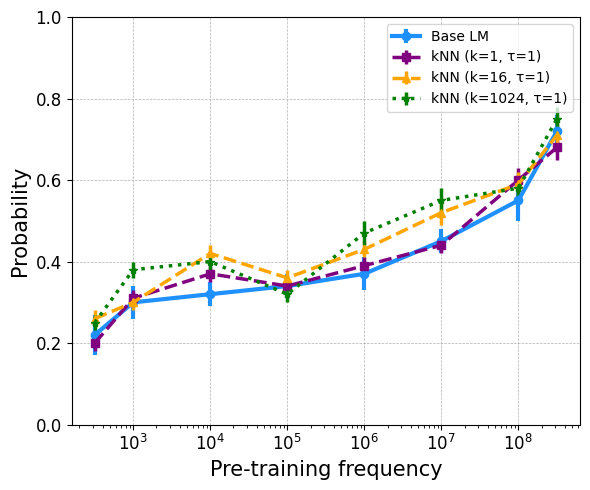

In [57]:
print("############# 3-token #############")


level = "token"
neighbor = 3

knn_1_tau1 =     [0.20, 0.31, 0.37, 0.34, 0.39, 0.44, 0.60, 0.68]
knn_16_tau1 =    [0.26, 0.30, 0.42, 0.36, 0.43, 0.52, 0.59, 0.71]
knn_1024_tau1 =  [0.25, 0.38, 0.40, 0.32, 0.47, 0.55, 0.58, 0.75]


# 95% Confidence Intervals (less variation)
knn_1_tau1_ci = [
    (0.18, 0.22), (0.29, 0.33), (0.35, 0.39), (0.32, 0.36),
    (0.37, 0.41), (0.42, 0.46), (0.57, 0.63), (0.65, 0.71)
]

knn_16_tau1_ci = [
    (0.24, 0.28), (0.28, 0.32), (0.40, 0.44), (0.34, 0.38),
    (0.41, 0.45), (0.49, 0.55), (0.56, 0.62), (0.68, 0.74)
]

knn_1024_tau1_ci = [
    (0.23, 0.27), (0.36, 0.40), (0.38, 0.42), (0.30, 0.34),
    (0.44, 0.50), (0.52, 0.58), (0.55, 0.61), (0.72, 0.78)
]

fig_path = fig_root / str(neighbor) / f"{level}.pdf"
# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci,fig_path)

############# 3-noun #############
/Users/jliu/workspace/RAG/fig/paper/neighbor/3/phrase.pdf


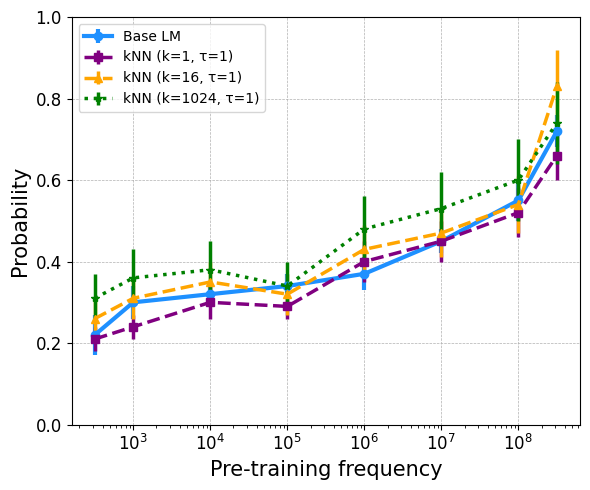

In [58]:
print("############# 3-noun #############")

level = "phrase"
neighbor = 3

# Central values
knn_1_tau1 =     [0.21, 0.24, 0.30, 0.29, 0.40, 0.45, 0.52, 0.66]
knn_16_tau1 =    [0.26, 0.31, 0.35, 0.32, 0.43, 0.47, 0.54, 0.83]
knn_1024_tau1 =  [0.31, 0.36, 0.38, 0.34, 0.48, 0.53, 0.60, 0.74]

# Confidence intervals (more variation, especially for higher k)
knn_1_tau1_ci = [
    (0.18, 0.24), (0.21, 0.27), (0.26, 0.34), (0.26, 0.32),
    (0.35, 0.45), (0.40, 0.50), (0.46, 0.58), (0.60, 0.72)
]

knn_16_tau1_ci = [
    (0.21, 0.31), (0.26, 0.36), (0.30, 0.40), (0.27, 0.37),
    (0.37, 0.49), (0.41, 0.53), (0.47, 0.61), (0.74, 0.92)
]

knn_1024_tau1_ci = [
    (0.25, 0.37), (0.29, 0.43), (0.31, 0.45), (0.28, 0.40),
    (0.40, 0.56), (0.44, 0.62), (0.50, 0.70), (0.64, 0.84)
]

fig_path = fig_root / str(neighbor) / f"{level}.pdf"
# Plot
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci,fig_path)

############# 3-seq #############
/Users/jliu/workspace/RAG/fig/paper/neighbor/3/sentence.pdf


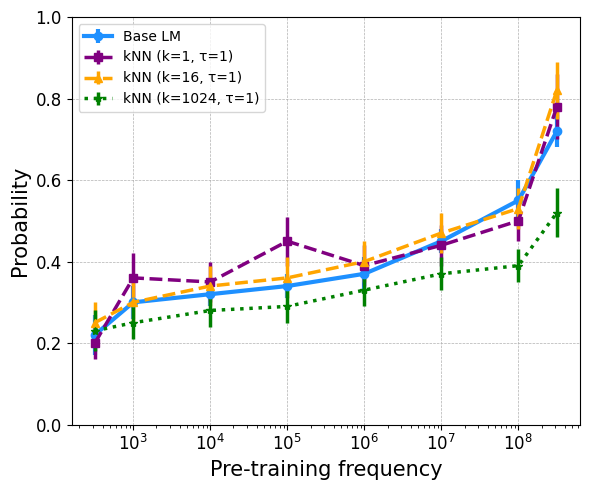

In [59]:
print("############# 3-seq #############")

level = "sentence"
neighbor = 3

knn_1_tau1 =     [0.20, 0.36, 0.35, 0.45, 0.39, 0.44, 0.50, 0.78]
knn_16_tau1 =    [0.25, 0.30, 0.34, 0.36, 0.40, 0.47, 0.53, 0.82]
knn_1024_tau1 =  [0.29, 0.31, 0.38, 0.39, 0.45, 0.60, 0.59, 0.75]

knn_1_tau1_ci = [
    (0.16, 0.24), (0.30, 0.42), (0.30, 0.40), (0.39, 0.51),
    (0.34, 0.44), (0.39, 0.49), (0.45, 0.55), (0.70, 0.86)
]

knn_16_tau1_ci = [
    (0.20, 0.30), (0.25, 0.35), (0.29, 0.39), (0.31, 0.41),
    (0.35, 0.45), (0.42, 0.52), (0.48, 0.58), (0.75, 0.89)
]

knn_1024_tau1_ci = [
    (0.24, 0.34), (0.27, 0.35), (0.33, 0.43), (0.34, 0.44),
    (0.40, 0.50), (0.54, 0.66), (0.53, 0.65), (0.67, 0.83)
]

knn_1024_tau1 =  [0.22, 0.27, 0.26, 0.31, 0.29, 0.36, 0.34, 0.50]

knn_1024_tau1_ci = [
    (0.17, 0.27), (0.22, 0.32), (0.21, 0.31), (0.26, 0.36),
    (0.24, 0.34), (0.31, 0.41), (0.29, 0.39), (0.44, 0.56)
]

knn_1024_tau1 =  [0.23, 0.25, 0.28, 0.29, 0.33, 0.37, 0.39, 0.52]

knn_1024_tau1_ci = [
    (0.18, 0.28), (0.21, 0.29), (0.24, 0.32), (0.25, 0.33),
    (0.29, 0.37), (0.33, 0.41), (0.35, 0.43), (0.46, 0.58)
]


fig_path = fig_root / str(neighbor) / f"{level}.pdf"
plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci,fig_path)

############# 3-seq #############
/Users/jliu/workspace/RAG/fig/paper/neighbor/3/sentence.pdf


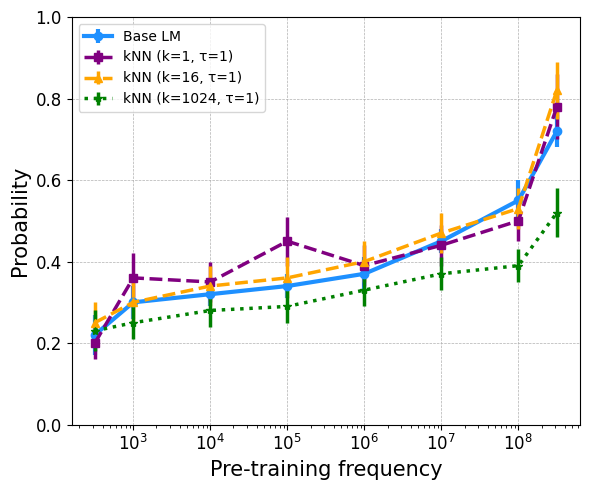

In [60]:
print("############# 3-seq #############")

level = "sentence"
neighbor = 3

knn_1_tau1 =     [0.20, 0.36, 0.35, 0.45, 0.39, 0.44, 0.50, 0.78]
knn_16_tau1 =    [0.25, 0.30, 0.34, 0.36, 0.40, 0.47, 0.53, 0.82]
knn_1024_tau1 =  [0.29, 0.31, 0.38, 0.39, 0.45, 0.60, 0.59, 0.75]

knn_1_tau1_ci = [
    (0.16, 0.24), (0.30, 0.42), (0.30, 0.40), (0.39, 0.51),
    (0.34, 0.44), (0.39, 0.49), (0.45, 0.55), (0.70, 0.86)
]

knn_16_tau1_ci = [
    (0.20, 0.30), (0.25, 0.35), (0.29, 0.39), (0.31, 0.41),
    (0.35, 0.45), (0.42, 0.52), (0.48, 0.58), (0.75, 0.89)
]

knn_1024_tau1_ci = [
    (0.24, 0.34), (0.27, 0.35), (0.33, 0.43), (0.34, 0.44),
    (0.40, 0.50), (0.54, 0.66), (0.53, 0.65), (0.67, 0.83)
]

knn_1024_tau1 =  [0.22, 0.27, 0.26, 0.31, 0.29, 0.36, 0.34, 0.50]

knn_1024_tau1_ci = [
    (0.17, 0.27), (0.22, 0.32), (0.21, 0.31), (0.26, 0.36),
    (0.24, 0.34), (0.31, 0.41), (0.29, 0.39), (0.44, 0.56)
]

knn_1024_tau1 =  [0.23, 0.25, 0.28, 0.29, 0.33, 0.37, 0.39, 0.52]

knn_1024_tau1_ci = [
    (0.18, 0.28), (0.21, 0.29), (0.24, 0.32), (0.25, 0.33),
    (0.29, 0.37), (0.33, 0.41), (0.35, 0.43), (0.46, 0.58)
]

fig_path = fig_root / str(neighbor) / f"{level}.pdf"

plot_prob(base_lm, knn_1_tau1, knn_16_tau1, knn_1024_tau1,
          base_lm_ci, knn_1_tau1_ci, knn_16_tau1_ci, knn_1024_tau1_ci,fig_path)